### Within this Notebook, consist of the various big data analysis made for the course Big Data

#### Table of Content

1. top 10 US Republicans/Democrats Politician that has the most tweets and also their most used words
2. Comparison between the amount of tweets done by the Republican and Democrate party in the house of representative
3. Top 10 most used words by the Republican/Democrats party
4. Tweet usage done within a certain critical time period in politics

In [213]:
import pandas as pd
import numpy as np
import csv
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

### top 10 US Republicans/Democrats Politician that has the most tweets and also their most used words

In [214]:
df = pd.read_csv('tweet_per_user.csv')
df = df.sort_values(by=['tweet count'], ascending=False)

top_10_most_tweets_politicians = df.head(10)
df

,username,tweet count
376,Steny_Hoyer,21650
375,Frank_Pallone,19827
374,Pramila_Jayapal,18394
373,Donald_Beyer,16763
372,David_Cicilline,16024
...,...,...
4,Jake_Ellzey,140
3,Brad_Finstad,131
2,Joe_Sempolinski,81
1,Connie_Conway,73


<AxesSubplot:xlabel='username'>

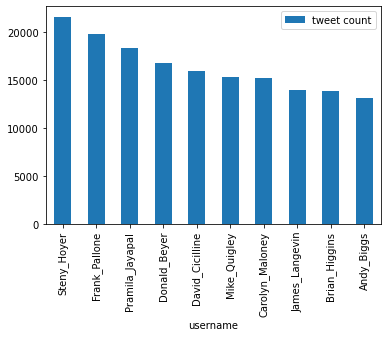

In [215]:
top_10_most_tweets_politicians

top_10_most_tweets_politicians.plot(kind='bar', y='tweet count', x="username")

Wordcloud of the 50 most used words by Democrats and Republicans

today 56907
us 41987
great 41271
american 36430
house 36112
president 31961
bill 30023
thank 29885
americans 29766
biden 28857
people 28456
border 28355
work 28231
day 26926
act 26722
time 26333
new 25956
congress 25715
im 24970
democrats 24095
support 23172
must 22927
need 22695
help 21868
week 21269
proud 20739
one 20073
country 20052
last 19815
america 18910
national 18714
thanks 18695
get 17926
families 17584
years 17501
tax 17445
office 17388
would 17183
state 17115
energy 17054
see 17051
year 16998
first 16993
happy 16488
here 16313
jobs 16302
health 16234
read 16093
service 16057
continue 15966
today 118246
us 81402
act 77222
must 73660
health 69981
need 67644
work 65992
people 63794
help 62074
im 61515
families 59487
house 57625
congress 57455
americans 54813
time 54154
new 53255
bill 53247
support 52153
american 51483
proud 50600
care 50481
great 48289
community 48251
day 47890
make 46476
get 45862
thank 42800
trump 42788
president 42708
country 40800
one 40577
working 38437
c

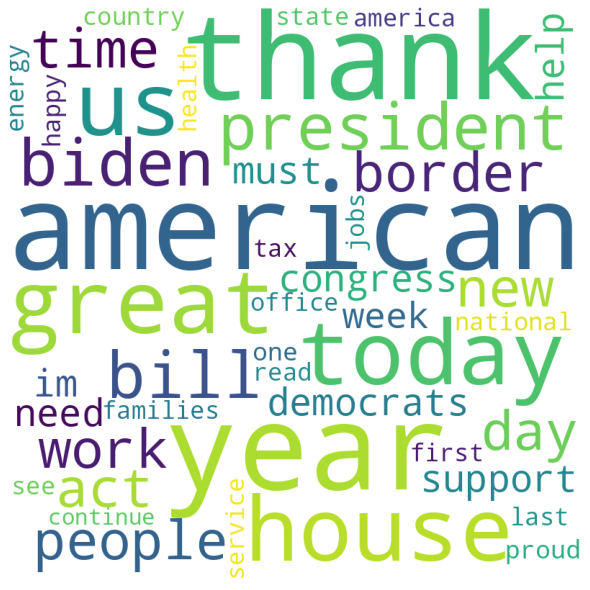

In [216]:
# Reads 'Youtube04-Eminem.csv' file
df = pd.read_csv('data_preprocessed/3_word_count_per_party.csv')
df = df.dropna()

df2 = df.sort_values(by=['wordcount'], ascending=False)
Republican_word_count = df2[df2['party'].str.contains("Republican")]
Democrat_word_count = df2[df2['party'].str.contains("Democrat")]


# seperate republican and democrat word counts
Republican_word_count = Republican_word_count.sort_values(by=['wordcount'], ascending=False)
Democrat_word_count = Democrat_word_count.sort_values(by=['wordcount'], ascending=False)

# take the top 50
top_50_Republican_word_count = Republican_word_count.head(50)
top_50_Democrat_word_count = Democrat_word_count.head(50)
top_50_Republican_word_count

#words processing
top_50_Republican_words = []
top_50_Democrat_words = []

for index, row in top_50_Republican_word_count.iterrows():
    print(row['word'], row['wordcount'])
    top_50_Republican_words.append(row['word'])

republican_words = ''
republican_words += " ".join(top_50_Republican_words)+" "

#iterate through the dataframe
for index, row in top_50_Democrat_word_count.iterrows():
    print(row['word'], row['wordcount'])
    top_50_Democrat_words.append(row['word'])

Democrat_words = ''
Democrat_words += " ".join(top_50_Democrat_words)+" "


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white').generate(republican_words)


# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

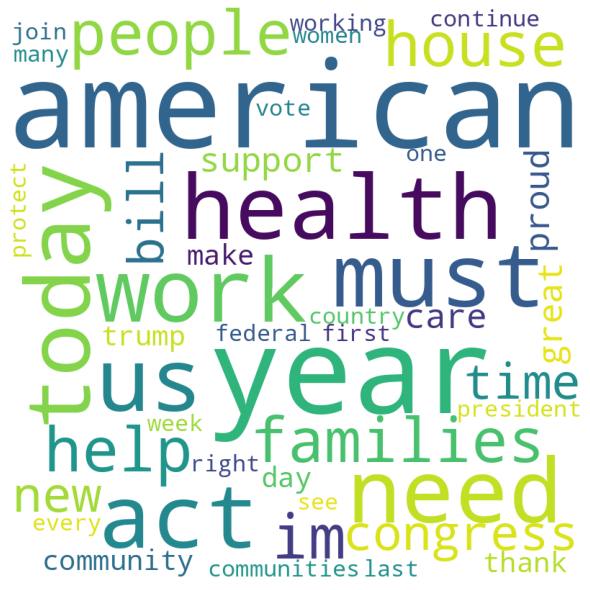

In [217]:
'''
Republican Wordcloud generator
'''
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white').generate(Democrat_words)


# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Top 10 Most used Words by both Democrats and Republicans House of Representative

In [218]:
top_10_Republican_word_count = top_50_Republican_word_count.head(10)

top_10_Republican_word_count

,party,word,wordcount
354940,Republican,today,56907
354939,Republican,us,41987
354938,Republican,great,41271
354937,Republican,american,36430
354936,Republican,house,36112
354935,Republican,president,31961
354934,Republican,bill,30023
354933,Republican,thank,29885
354932,Republican,americans,29766
354931,Republican,biden,28857


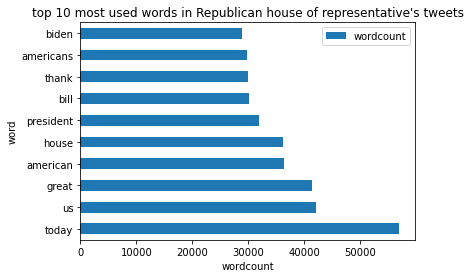

In [219]:
colors = ['#f2b86b']
ax = top_10_Republican_word_count.plot.barh(ylabel='word', xlabel='wordcount',x='word', color=['C0'], title="top 10 most used words in Republican house of representative's tweets")
plt.show()

In [220]:
top_10_Democrat_word_count = top_50_Democrat_word_count.head(10)

top_10_Democrat_word_count

,party,word,wordcount
212102,Democrat,today,118246
212101,Democrat,us,81402
212100,Democrat,act,77222
212099,Democrat,must,73660
212098,Democrat,health,69981
212097,Democrat,need,67644
212096,Democrat,work,65992
212095,Democrat,people,63794
212094,Democrat,help,62074
212093,Democrat,im,61515


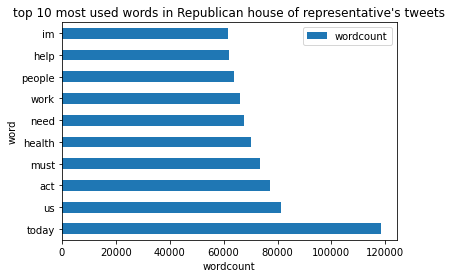

In [221]:
colors = ['#f2b86b']
ax = top_10_Democrat_word_count.plot.barh(ylabel='word', xlabel='wordcount',x='word', color=['C0'], title="top 10 most used words in Republican house of representative's tweets")
plt.show()

### Pie Chart for the tweet frequency of each parties overall

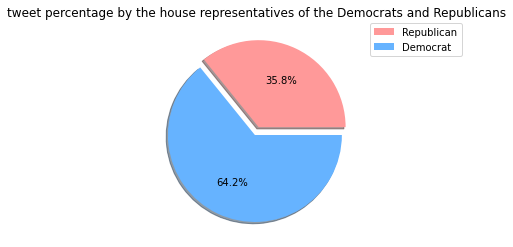

In [222]:
df = pd.read_csv('data_preprocessed/1_tweet_per_party.csv')
df = df[1:]
df


# plot pie chart

# colors = ['#0000ff','#DE0100']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax = df.plot(kind='pie', y='tweet count',
 colors=colors, autopct='%1.1f%%', 
 shadow=True, explode=[0.05, 0.05],
 title='tweet percentage by the house representatives of the Democrats and Republicans',
 legend=True, ylabel='',labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left', labels=df.username)
plt.show()


Time Series Analysis of Tweeter Usage by the House of Representative of the Democrat and Republican Party

Hashtags popularities by the House of Representative of the Democrat and Republican Party overall

In [223]:
#Dataframes preprocessing
df = pd.read_csv('data_preprocessed/5_hastag_count_per_party_after_date.csv')
df = df.dropna()
Republican_hashtag_count = df[df['party'].str.contains("Republican")]
Democrat_hashtag_count = df[df['party'].str.contains("Democrat")]

Republican_hashtag_count = Republican_hashtag_count.sort_values(by=['hashtag count'], ascending=False)
Democrat_hashtag_count = Democrat_hashtag_count.sort_values(by=['hashtag count'], ascending=False)

top_50_Democrat_hashtag = Democrat_hashtag_count.head(50)
top_50_Republican_hashtag = Republican_hashtag_count.head(50)

top_50_Democrat_hashtag_list = []
top_50_Republican_hashtag_list = []

top_50_Democrat_hashtag


,party,hashtag,hashtag count
74735,Democrat,covid19,18714
74734,Democrat,forthepeople,8646
74733,Democrat,aca,7082
74732,Democrat,americanrescueplan,6883
74731,Democrat,buildbackbetter,6694
74730,Democrat,sotu,5518
74729,Democrat,az01,4516
74728,Democrat,trumpcare,4278
74727,Democrat,protectourcare,4151
74726,Democrat,getcovered,4120


In [224]:
#Wordcloud words preprocessing
for index, row in top_50_Republican_hashtag.iterrows():
    print(row['hashtag'], row['hashtag count'])
    top_50_Republican_hashtag_list.append(row['hashtag'])

Republican_hashtags = ''
Republican_hashtags += " ".join(top_50_Republican_hashtag_list)+" "

for index, row in top_50_Democrat_hashtag.iterrows():
    print(row['hashtag'], row['hashtag count'])
    top_50_Democrat_hashtag_list.append(row['hashtag'])

Democrat_hashtags = ''
Democrat_hashtags += " ".join(top_50_Democrat_hashtag_list)+" "

tcot 7842
obamacare 5227
covid19 4952
sotu 4182
smallbiz 3654
taxreform 3195
az05 2876
4jobs 2815
ar3 2632
utpol 2475
jobs 2418
gop 2291
bidenbordercrisis 2092
ny21 1901
usmca 1763
ar4 1761
mi06 1737
coronavirus 1649
al03 1624
veterans 1445
taxcutsandjobsact 1423
ms01 1366
irs 1342
prolife 1279
ne03 1109
puertorico 1085
arpx 1058
neverforget 1033
energy 1016
va 1011
ccp 999
in08 998
scotus 986
ndaa 977
commitmenttoamerica 974
ia02 941
keystonexl 922
sayfie 921
il16 908
veteransday 890
healthcare 889
betterway 851
2a 842
bidenflation 797
va01 787
memorialday 786
1 779
tbt 778
tn03 763
betteroffnow 762
covid19 18714
forthepeople 8646
aca 7082
americanrescueplan 6883
buildbackbetter 6694
sotu 5518
az01 4516
trumpcare 4278
protectourcare 4151
getcovered 4120
goptaxscam 4041
actonclimate 3710
scotus 3545
childtaxcredit 3530
endgunviolence 3419
coronavirus 3416
daca 3264
2020census 3144
bringbackourgirls 3128
dreamers 2988
climatechange 2973
raisethewage 2873
blackhistorymonth 2837
p2 2837
h

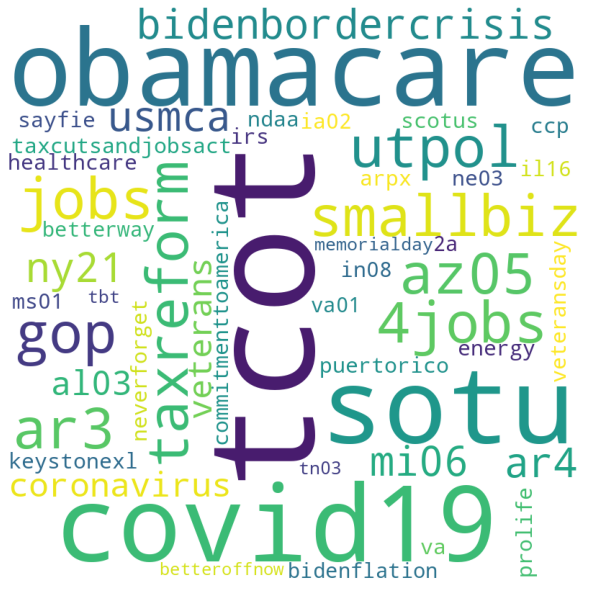

In [225]:
'''
Republican Hashtag WordCloud
'''
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white').generate(Republican_hashtags)


#  plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

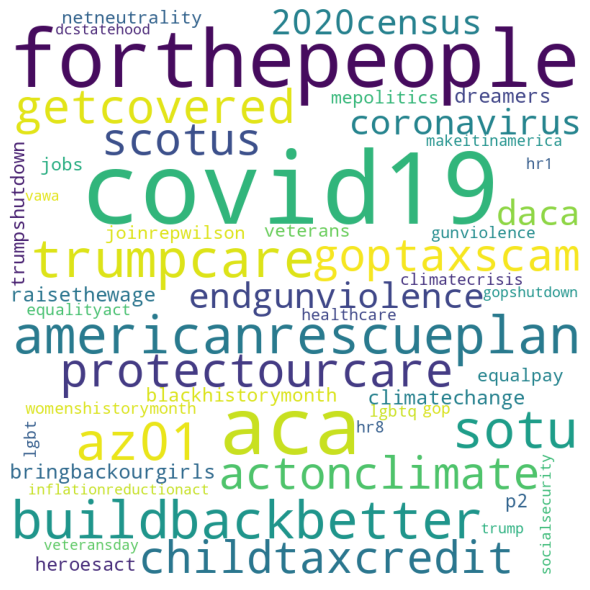

In [226]:
'''
Democrat Hashtag WordCloud
'''
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white').generate(Democrat_hashtags)


#  plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Sentiment Analysis

1. Sentiment towards FAANG and data

In [227]:
df = pd.read_csv('data_preprocessed/sentiment_Hi_KENNY.csv') #sentiment towards FAANG
df

# seperate between Democrat and Republican
Republican_sentiment = df[df['Party'].str.contains("Republican")]
Democrat_sentiment = df[df['Party'].str.contains("Democrat")]

Democrat_sentiment
Republican_sentiment

,Name,Party,Polarity,Subjectivity
215,Adam_Kinzinger,Republican,0.20,0.43
216,Adrian_Smith,Republican,0.18,0.51
217,Alexander_Mooney,Republican,0.07,0.26
218,Andrew_Clyde,Republican,-0.05,0.42
219,Andrew_Garbarino,Republican,-0.04,0.60
...,...,...,...,...
412,W._Steube,Republican,0.03,0.27
413,Warren_Davidson,Republican,0.07,0.41
414,William_Timmons,Republican,0.09,0.39
415,Young_Kim,Republican,-0.01,0.28


Text(0.5, 1.0, 'Sentiment towards Data and FAANG companies')

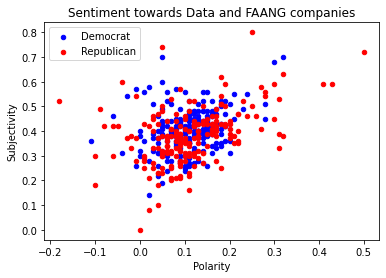

In [228]:
ax = Democrat_sentiment.reset_index().plot(kind='scatter', x='Polarity', y='Subjectivity',
                                           color='Blue', label='Democrat')

Republican_sentiment.reset_index().plot(kind='scatter', x='Polarity', y='Subjectivity',
                                          color='Red', label='Republican', ax=ax)
ax.set_title('Sentiment towards Data and FAANG companies')

2. General Sentiment

In [229]:
df = pd.read_csv('data_preprocessed/sentiment_categorillas.csv') #sentiment towards FAANG
df

# seperate between Democrat and Republican
Republican_sentiment = df[df['Party'].str.contains("Republican")]
Democrat_sentiment = df[df['Party'].str.contains("Democrat")]

Democrat_sentiment
Republican_sentiment

,Name,Party,Polarity,Subjectivity
218,Adam_Kinzinger,Republican,0.15,0.39
219,Adrian_Smith,Republican,0.16,0.36
220,Alexander_Mooney,Republican,0.21,0.43
221,Andrew_Clyde,Republican,0.05,0.37
222,Andrew_Garbarino,Republican,0.13,0.45
...,...,...,...,...
421,W._Steube,Republican,0.09,0.37
422,Warren_Davidson,Republican,0.10,0.38
423,William_Timmons,Republican,0.15,0.42
424,Young_Kim,Republican,0.14,0.41


Text(0.5, 1.0, 'Sentiments in all tweets(General)')

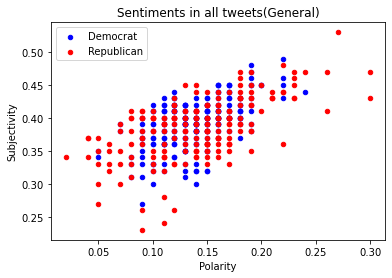

In [230]:
ax = Democrat_sentiment.reset_index().plot(kind='scatter', x='Polarity', y='Subjectivity',
                                           color='Blue', label='Democrat')

Republican_sentiment.reset_index().plot(kind='scatter', x='Polarity', y='Subjectivity',
                                          color='Red', label='Republican', ax=ax)
ax.set_title('Sentiments in all tweets(General)')

3. Sentiment towards the keyword war, putin, and ukraine

In [231]:
df = pd.read_csv('data_preprocessed/sentiment_Categories-war_ukraine_putin.csv') #sentiment towards FAANG
df

# seperate between Democrat and Republican
Republican_sentiment = df[df['Party'].str.contains("Republican")]
Democrat_sentiment = df[df['Party'].str.contains("Democrat")]

Democrat_sentiment
Republican_sentiment

,Name,Party,Polarity,Subjectivity
214,Adam_Kinzinger,Republican,-0.04,0.47
215,Adrian_Smith,Republican,0.06,0.50
216,Alexander_Mooney,Republican,0.05,0.36
217,Andrew_Clyde,Republican,-0.02,0.31
218,Andrew_Garbarino,Republican,0.10,0.35
...,...,...,...,...
410,W._Steube,Republican,0.04,0.33
411,Warren_Davidson,Republican,0.11,0.42
412,William_Timmons,Republican,-0.08,0.32
413,Young_Kim,Republican,0.14,0.37


Text(0.5, 1.0, 'Sentiment towards War, Ukraine, and Putin')

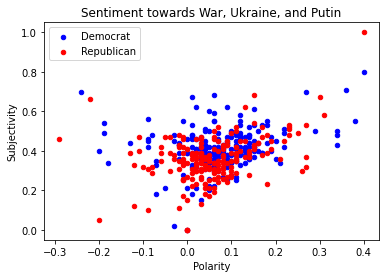

In [232]:
ax = Democrat_sentiment.reset_index().plot(kind='scatter', x='Polarity', y='Subjectivity',
                                           color='Blue', label='Democrat')

Republican_sentiment.reset_index().plot(kind='scatter', x='Polarity', y='Subjectivity',
                                          color='Red', label='Republican', ax=ax)
ax.set_title('Sentiment towards War, Ukraine, and Putin')

4. Sentiment towards Germany

In [235]:
df = pd.read_csv('data_preprocessed/sentiment_Categories-germany.csv') #sentiment towards FAANG
df

# seperate between Democrat and Republican
Republican_sentiment = df[df['Party'].str.contains("Republican")]
Democrat_sentiment = df[df['Party'].str.contains("Democrat")]

Democrat_sentiment
Republican_sentiment

,Name,Party,Polarity,Subjectivity
39,Andy_Barr,Republican,-0.20,0.45
40,August_Pfluger,Republican,0.42,0.68
41,Barry_Loudermilk,Republican,0.00,0.00
42,Barry_Moore,Republican,0.11,0.35
43,Ben_Cline,Republican,0.47,0.87
44,Brian_Fitzpatrick,Republican,0.12,0.29
45,Brian_Mast,Republican,0.14,0.33
46,Bryan_Steil,Republican,0.00,0.55
47,Buddy_Carter,Republican,0.00,0.00
48,Burgess_Owens,Republican,0.80,1.00


Text(0.5, 1.0, 'Sentiment towards Germany')

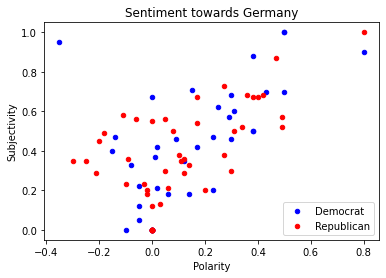

In [236]:
ax = Democrat_sentiment.reset_index().plot(kind='scatter', x='Polarity', y='Subjectivity',
                                           color='Blue', label='Democrat')

Republican_sentiment.reset_index().plot(kind='scatter', x='Polarity', y='Subjectivity',
                                          color='Red', label='Republican', ax=ax)
ax.set_title('Sentiment towards Germany')

5. Sentiment towards Covid and Covid19